In [17]:
import pandas as pd
import rdflib
import pickle

from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs import KG
from pyrdf2vec.walkers import RandomWalker

from pprint import pprint
import progressbar
from multiprocessing import Pool

SEED = 42 ## NOTE: Does not appear to work properly due to Word2Vec implementation not allowing for setting the random state

# Note: this is needed for reproducibility. Makes the 'random' processes within this notebook deterministic


In [4]:
with open("./data/tranformer_pickles/trans1.pkl", "rb") as file:
    transformer = pickle.load(file)

print(transformer.embedder._model.wv)

KeyedVectors<vector_size=100, 204446 keys>


In [10]:
with open("./data/other_pickles/corpus.pkl", "rb") as file:
    corpus = pickle.load(file)

with open("./data/other_pickles/walks_2.pkl", "rb") as file:
    walks = pickle.load(file)

In [15]:
print(corpus[:2])
vocab = {entity for walk in corpus for entity in walk}

[('http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C104317', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', "b'\\xef\\xcag\\xf4U\\x95j2'", 'http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#A8', "b':\\\\8\\xcd\\xd1\\xc3\\xcb\\x03'", 'http://www.w3.org/2000/01/rdf-schema#subClassOf', "b'&\\xa2&\\xa9\\x91U\\x17r'", 'http://www.w3.org/2000/01/rdf-schema#subClassOf', "b'W\\r\\x91\\xee\\x18\\xb7\\xc1#'", 'http://www.w3.org/2000/01/rdf-schema#subClassOf', "b'\\x18\\xde\\xc2\\xe3\\x11\\xf4\\xd7\\xa3'"), ('http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C104316', 'http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#A8', "b'\\xd9\\xab\\xe1\\x8e\\xc0\\xca\\xfbZ'", 'http://www.w3.org/2000/01/rdf-schema#subClassOf', "b':\\\\8\\xcd\\xd1\\xc3\\xcb\\x03'", 'http://www.w3.org/2000/01/rdf-schema#subClassOf', "b'&\\xa2&\\xa9\\x91U\\x17r'", 'http://www.w3.org/2000/01/rdf-schema#subClassOf', "b'W\\r\\x91\\xee\\x18\\xb7\\xc1#'")]


In [16]:
print(len(vocab))

204446


In [4]:
print(rdflib.URIRef('http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C104317').toPython())
print(str(rdflib.URIRef('http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C104317')))

http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C104317
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C104317


In [3]:
transformer.embedder._model.lifecycle_events

[{'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.025>',
  'datetime': '2023-04-06T20:22:56.587768',
  'gensim': '4.3.1',
  'python': '3.9.2 (default, Jun  1 2021, 22:43:03) \n[GCC 9.3.0]',
  'platform': 'Linux-5.14.0-1059-oem-x86_64-with-glibc2.31',
  'event': 'created'},
 {'msg': 'effective_min_count=0 retains 204382 unique words (100.00% of original 204382, drops 0)',
  'datetime': '2023-04-06T21:04:47.388192',
  'gensim': '4.3.1',
  'python': '3.9.2 (default, Jun  1 2021, 22:43:03) \n[GCC 9.3.0]',
  'platform': 'Linux-5.14.0-1059-oem-x86_64-with-glibc2.31',
  'event': 'prepare_vocab'},
 {'msg': 'effective_min_count=0 leaves 24262886 word corpus (100.00% of original 24262886, drops 0)',
  'datetime': '2023-04-06T21:04:47.388234',
  'gensim': '4.3.1',
  'python': '3.9.2 (default, Jun  1 2021, 22:43:03) \n[GCC 9.3.0]',
  'platform': 'Linux-5.14.0-1059-oem-x86_64-with-glibc2.31',
  'event': 'prepare_vocab'},
 {'msg': 'downsampling leaves estimated 12861464.164981876 word corpus (

In [11]:
nodes = get_entities("./data/tax_and_subset_NCIT.ttl")

In [23]:
missing_nodes = []
for n in nodes:
    if not transformer.embedder._model.wv.has_index_for(n):
        print(n)
        missing_nodes.append(n)

print(len(missing_nodes))

http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C2927
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C50311
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C33313
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C20047
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C19406
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C150794
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C49652
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C154811
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C132308
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C96145
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C744
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C4046
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C167265
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C140617
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C118420
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C138278
http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C103045
http://nci

In [17]:
print(list(kg._entities)[:10])

[Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C120752'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C175695'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C170299'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C26377'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C100222'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C117286'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C28093'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C118369'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C89369'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C114946')]


In [18]:
kg = KG("./data/tax_and_subset_NCIT.ttl",)


In [42]:
name_set = {k for k in list(kg._transition_matrix.keys())}
vertex = list(name_set)[0]


walk = [(pred, obj) for pred in kg._transition_matrix[vertex] for obj in kg._transition_matrix[pred] if len(kg._transition_matrix[pred]) != 0 ]

print(walk)

[(Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#A8'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C118168')), (Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#A8'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C116977')), (Vertex(name='http://www.w3.org/2000/01/rdf-schema#subClassOf'), Vertex(name='http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C133456'))]


In [8]:

filtered_entities = [e for e in nodes if e in kg._entities]
not_found = set(nodes) - set(filtered_entities)

print(len(not_found))

NameError: name 'nodes' is not defined

In [9]:
len(kg._entities)

178722

In [4]:
kg = rdflib.Graph()
kg.parse("./data/tax_and_subset_NCIT.ttl")


<Graph identifier=Nebb7456817a648fc8945f0e8c06a0a79 (<class 'rdflib.graph.Graph'>)>

In [20]:

context = list(kg.query(
    f'SELECT ?s ?p WHERE {{?s ?p <{missing_nodes[0]}> .}}'
))

for c in zip(context, missing_nodes):
    print(c)

((rdflib.term.URIRef('http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C118620'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf')), 'http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C15632')
((rdflib.term.URIRef('http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C122369'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf')), 'http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C183076')
((rdflib.term.URIRef('http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C15183'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf')), 'http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C76324')
((rdflib.term.URIRef('http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C15578'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf')), 'http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C141465')
((rdflib.term.URIRef('http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C15681'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf

In [4]:
data = pd.read_csv("./data/taxonomy_rank_trip_store/rank_0_to_1.csv", sep=",",)
entities = [entity[1][0] for entity in data[data.columns[1:]].iterrows()]
print(entities)

['http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf', 'http://www.w3.org/2000/01/rdf-schema#subClassOf']


In [2]:
# Read a CSV file containing the entities we want to classify.
tax_and_sub = rdflib.Graph()
tax_and_sub.parse("./data/tax_NCIT.ttl")

nodes_result = list(tax_and_sub.query(
        'SELECT DISTINCT ?s WHERE { ?s ?p ?o. }'
        ))
nodes = [n[0].toPython() for n in nodes_result]
nodes.append('http://www.w3.org/2002/07/owl#Thing') # This it the top node, which is not retrieved by the query




In [9]:
nodes[-5:0]

['http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C66700',
 'http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C123984',
 'http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C119206',
 'http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C32659',
 'http://www.w3.org/2002/07/owl#Thing']

[]

In [3]:
# Define our knowledge graph (here: DBPedia SPARQL endpoint).
%env PYTHONHASHSEED=$SEED

knowledge_graph = KG(
    "./data/tax_and_subset_NCIT.ttl",
)

# Create our transformer, setting the embedding & walking strategy.
transformer = RDF2VecTransformer(
    Word2Vec(epochs=0, workers=1),
    walkers=[RandomWalker(4, 10, with_reverse=False, n_jobs=3, random_state=SEED)],
    verbose=2
)
transformer.embedder._model.compute_loss = True

# transformer.embedder._model.compute_loss = True
# Get our embeddings.
embeddings, literals = transformer.fit_transform(knowledge_graph, nodes, random_state=SEED)
# pprint(embeddings)
# [
#     array([ 1.5737595e-04,  1.1333118e-03, -2.9838676e-04,  ..., -5.3064007e-04,
#             4.3192197e-04,  1.4529384e-03], dtype=float32),
#     array([-5.9027621e-04,  6.1689125e-04, -1.1987977e-03,  ...,  1.1066757e-03,
#            -1.0603866e-05,  6.6087965e-04], dtype=float32),
#     array([ 7.9996325e-04,  7.2907173e-04, -1.9482171e-04,  ...,  5.6251377e-04,
#             4.1435464e-04,  1.4478950e-04], dtype=float32)
# ]


env: PYTHONHASHSEED=42


100%|██████████| 178722/178722 [05:46<00:00, 515.28it/s]


Extracted 1612661 walks for 178722 entities (347.0949s)
Fitted 1612661 walks (15.9126s)


In [10]:
# walks = transformer.get_walks(knowledge_graph, nodes)

100%|██████████| 178722/178722 [05:26<00:00, 548.17it/s]


IndexError: pop index out of range

In [ ]:
# Define our knowledge graph (here: DBPedia SPARQL endpoint).
SEED = 43

%env PYTHONHASHSEED=$SEED

knowledge_graph = KG(
    "./data/tax_and_subset_NCIT.ttl",
)


def create_walks(transformer, KG, nodes):
    walks = transformer.get_walks(KG, nodes)
    corpus = [walk for entity_walks in walks for walk in entity_walks]
    transformer.embedder._model.build_vocab(corpus, update=False)
    return walks, corpus


# epochs = 100
def fit_embedding(transformer, KG, nodes, epochs):
    walks, corpus = create_walks(transformer, KG, nodes)
    loss_df = pd.DataFrame(columns=['epoch', 'loss'])
    print('Starting fitting of word2vec embedding:')

    bar = progressbar.ProgressBar(maxval=epochs, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    for e in range(epochs):
        # print(f'currently processing epoch {e}')
        transformer.embedder._model.train(
            corpus,
            total_examples=transformer.embedder._model.corpus_count,
            epochs=1,
            compute_loss=True,
        )
        bar.update(e+1)
        loss_df = pd.concat([loss_df, pd.DataFrame(data={'epoch':[e], 'loss':transformer.embedder._model.get_latest_training_loss()})])
    bar.finish()

    embeddings, literals = transformer.transform(knowledge_graph, nodes)
    return embeddings, literals, loss_df

def init_transformer(seed):
    # Create our transformer, setting the embedding & walking strategy.
    transformer = RDF2VecTransformer(
        Word2Vec(epochs=0, workers=1),
        walkers=[RandomWalker(4, 10, with_reverse=False, n_jobs=1, random_state=seed)],
        verbose=2
    )
    transformer.embedder._model.compute_loss = True

def save_embeddings(embeddings, n_epochs, rep):
    df = pd.dataFrame(embeddings)
    df.to_pickle(f'./data/embeddings/{n_epochs}_{rep}.pkl')


def save_loss_data(loss_df, n_epochs, rep):
    loss_df.to_pickle(f'./data/loss_data/{n_epochs}_{rep}.pkl')


env: PYTHONHASHSEED=43


In [10]:
import copy

def run_experiment(KG, nodes, epochs, rep):
    transformer = init_transformer(rep)
    embeddings, literals, loss_df = fit_embedding(transformer, KG, nodes, epochs)
    save_embeddings(embeddings, epochs, rep)
    save_loss_data(loss_df, epochs, rep)


def get_entities(KG_loc):
    tax_and_sub = rdflib.Graph()
    tax_and_sub.parse(KG_loc)

    nodes_result = list(tax_and_sub.query(
            'SELECT DISTINCT ?s ?p ?o WHERE { ?s ?p ?o. }'
            ))
    objects = {n[0] for n in nodes_result}
    # predicates = {n[1].toPython() for n in nodes_result}
    subjects = {n[2] for n in nodes_result}
    entities = objects.union(subjects)
    return list(entities)



def main(args, n_reps, epoch_list):
    path_to_KG = "./data/tax_and_subset_NCIT.ttl"
    knowledge_graph = KG(
        path_to_KG,
    )
    nodes = get_entities(path_to_KG)
    exp_design = [(copy.deepcopy(KG), copy.deepcopy(nodes), epoch_list.copy(), i) for i in range(n_reps)]
    with Pool(n_reps) as p:
        p.starmap(run_experiment, exp_design)


In [17]:
loss_df = pd.DataFrame(columns=['epoch', 'loss'])

epochs = 10
for e in range(epochs):
    print(f'currently processing epoch {e}')
    transformer.embedder._model.train(
        corpus,
        total_examples=transformer.embedder._model.corpus_count,
        epochs=1,
        compute_loss=True,
    )
    loss_df = pd.concat([loss_df, pd.DataFrame(data={'epoch':[e], 'los':transformer.embedder._model.get_latest_training_loss()})])


In [6]:
embeddings, literals = transformer.transform(knowledge_graph, nodes)

df = pd.DataFrame(embeddings)
df.to_pickle('./data/embeddings/test3.pkl')

In [7]:
loss_df.to_pickle('./data/loss_data/test3.pkl')

<Axes: xlabel='epoch'>

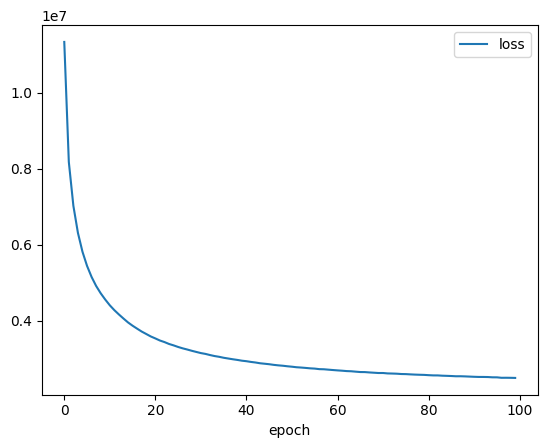

In [8]:
loss_df.plot(x='epoch', y='loss')

In [9]:
transformer.embedder._model.train(compute_loss=True, epochs=10, total_examples=transformer.embedder._model.corpus_count)

TypeError: Either one of corpus_file or corpus_iterable value must be provided

In [7]:
pprint(transformer.embedder._model.lifecycle_events)

[{'datetime': '2023-04-04T13:38:51.960438',
  'event': 'created',
  'gensim': '4.3.1',
  'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.025>',
  'platform': 'Linux-5.14.0-1059-oem-x86_64-with-glibc2.31',
  'python': '3.9.2 (default, Jun  1 2021, 22:43:03) \n[GCC 9.3.0]'},
 {'datetime': '2023-04-04T13:49:14.938209',
  'event': 'prepare_vocab',
  'gensim': '4.3.1',
  'msg': 'effective_min_count=0 retains 208970 unique words (100.00% of '
         'original 208970, drops 0)',
  'platform': 'Linux-5.14.0-1059-oem-x86_64-with-glibc2.31',
  'python': '3.9.2 (default, Jun  1 2021, 22:43:03) \n[GCC 9.3.0]'},
 {'datetime': '2023-04-04T13:49:14.938248',
  'event': 'prepare_vocab',
  'gensim': '4.3.1',
  'msg': 'effective_min_count=0 leaves 11056437 word corpus (100.00% of '
         'original 11056437, drops 0)',
  'platform': 'Linux-5.14.0-1059-oem-x86_64-with-glibc2.31',
  'python': '3.9.2 (default, Jun  1 2021, 22:43:03) \n[GCC 9.3.0]'},
 {'datetime': '2023-04-04T13:49:15.945991',
  'e

In [4]:
print(transformer.embedder._model.get_latest_training_loss())

0.0


In [ ]:
# Define our knowledge graph (here: DBPedia SPARQL endpoint).
knowledge_graph = KG(
    "./data/tax_and_subset_NCIT.ttl",
)
# Create our transformer, setting the embedding & walking strategy.
transformer = RDF2VecTransformer(
    Word2Vec(epochs=10),
    walkers=[RandomWalker(4, 10, with_reverse=False, n_jobs=3)],
    # verbose=1
)
# Get our embeddings.
embeddings, literals = transformer.fit_transform(knowledge_graph, nodes)
pprint(embeddings)
# [
#     array([ 1.5737595e-04,  1.1333118e-03, -2.9838676e-04,  ..., -5.3064007e-04,
#             4.3192197e-04,  1.4529384e-03], dtype=float32),
#     array([-5.9027621e-04,  6.1689125e-04, -1.1987977e-03,  ...,  1.1066757e-03,
#            -1.0603866e-05,  6.6087965e-04], dtype=float32),
#     array([ 7.9996325e-04,  7.2907173e-04, -1.9482171e-04,  ...,  5.6251377e-04,
#             4.1435464e-04,  1.4478950e-04], dtype=float32)
# ]

pprint(literals)

In [32]:
len(embeddings[0])

100